In [1]:
# Imports

import pandas as pd
import numpy as np
from model.model import RecommenderSystemModel
from utils import *
from data.results import Results
import warnings
import os
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

### Data Analysis

Standard deviation for max: 287.10618680202623
Coefficient of variation for max: 0.892500289262176


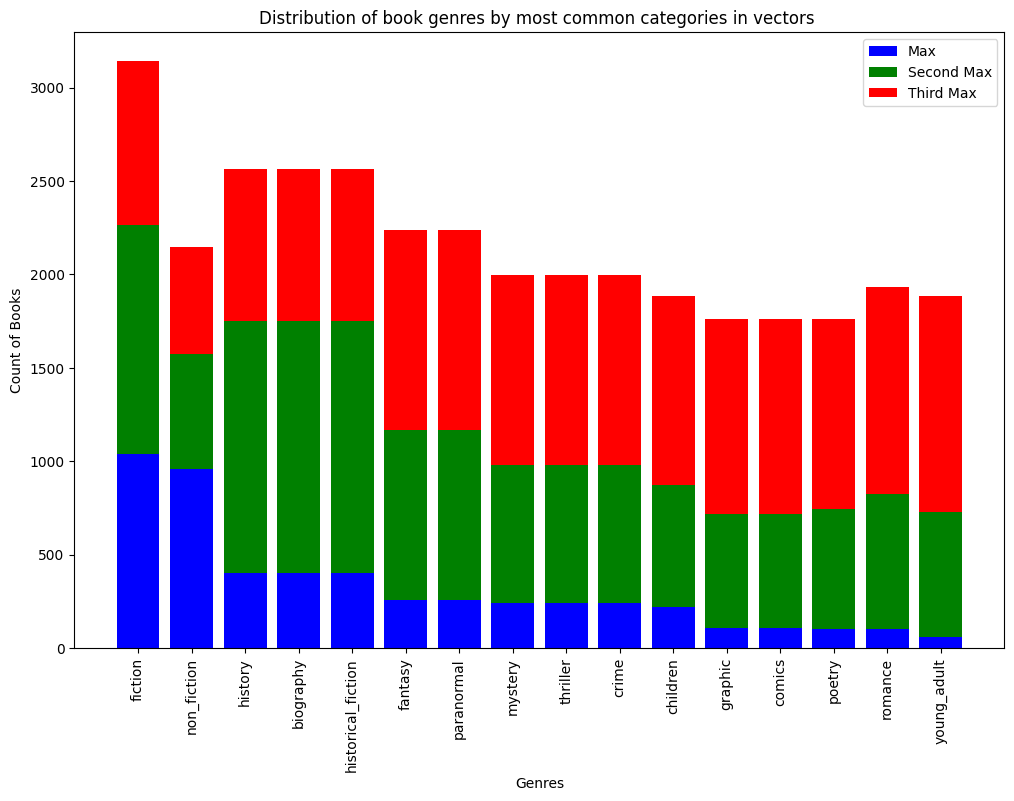

In [2]:
# Book genres distribution

df_items = pd.read_csv("data/results/2024-06-19_01/initial_items_1.csv")
plot_book_distribution_by_genre(df_items, stats="max")

### Results Analysis

In [3]:
# Get dataframes 

dfs_results_benchmark = []
dfs_results_covert = []
dfs_results_overt = []
dfs_results_overt_w_si = []
dfs_users_benchmark = []
dfs_users_covert = []
dfs_users_overt = []
dfs_users_overt_w_si = []

base_path = "data/results"
runs = sorted(os.listdir(base_path))
i = 1
for run in runs:
    full_path = os.path.join(base_path, run)
    if os.path.isdir(full_path):
        if i <= 20:
            df_results, df_users = load_results_dfs(path=full_path, i=i, model="benchmark")
            dfs_results_benchmark.append(df_results)
            dfs_users_benchmark.append(df_users) 
        elif i <= 40:
            df_results, df_users = load_results_dfs(path=full_path, i=i, model="covert")
            dfs_results_covert.append(df_results)
            dfs_users_covert.append(df_users) 
        elif i <= 60:
            df_results, df_users = load_results_dfs(path=full_path, i=i, model="overt")
            dfs_results_overt.append(df_results)
            dfs_users_overt.append(df_users) 
        else:
            df_results, df_users = load_results_dfs(path=full_path, i=i, model="overt_w_si")
            dfs_results_overt_w_si.append(df_results)
            dfs_users_overt_w_si.append(df_users) 
        print(f"Processed Dataframe {i}/80", end="\r")
        i += 1        

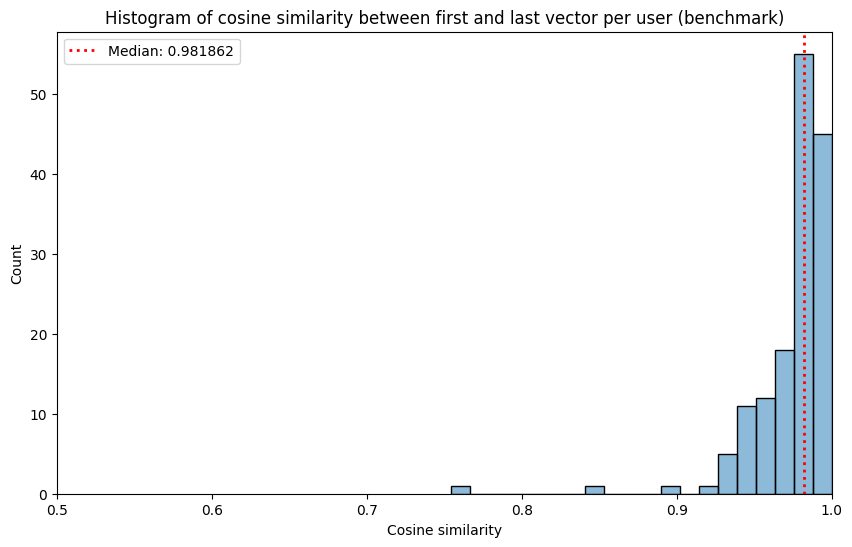

In [4]:
# Plot vector differences for benchmark model

df_users_benchmark = dfs_users_benchmark[0][["unique_id", "persona"]].rename(columns={"unique_id": "AgentID"})
df_results_benchmark = pd.concat(dfs_results_benchmark)
df_results_benchmark_filtered = df_results_benchmark.groupby(["AgentID"]).vector_diff.mean().reset_index()
df_results_benchmark_filtered = df_results_benchmark_filtered.merge(df_users_benchmark, how="inner", on="AgentID")
plot_vector_diffs(df=df_results_benchmark_filtered, model="benchmark")

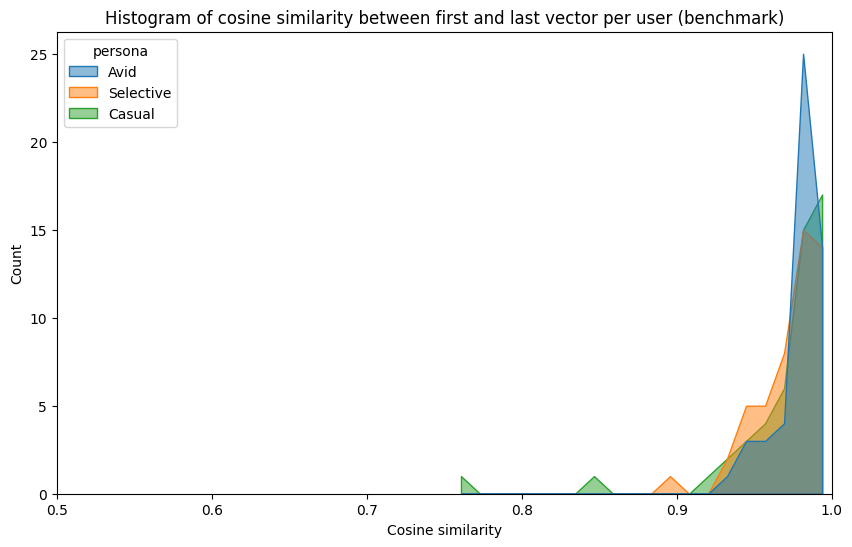

In [5]:
# Plot vector differences for benchmark model by reader persona

plot_vector_diffs_by_persona(df=df_results_benchmark_filtered, model="benchmark")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


00/20


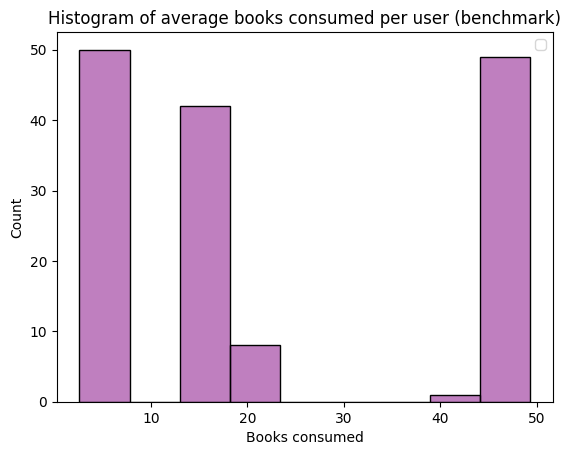

In [6]:
# Plot average books consumed per user for benchmark model

plot_books_consumed("benchmark")

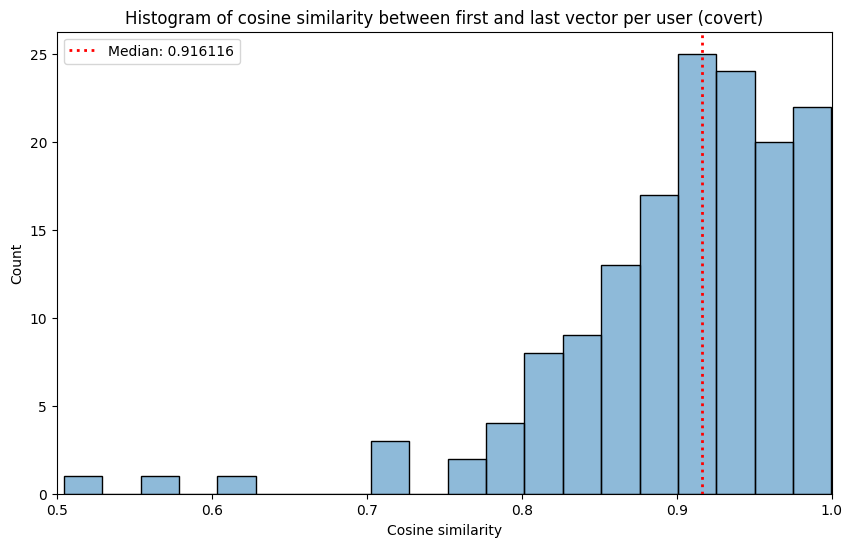

In [7]:
# Plot vector differences for covert model

df_users_covert = dfs_users_covert[0][["unique_id", "persona"]].rename(columns={"unique_id": "AgentID"})
df_results_covert = pd.concat(dfs_results_covert)
df_results_covert_filtered = df_results_covert.groupby(["AgentID"]).vector_diff.mean().reset_index()
df_results_covert_filtered = df_results_covert_filtered.merge(df_users_covert, how="inner", on="AgentID")
plot_vector_diffs(df=df_results_covert_filtered, model="covert")

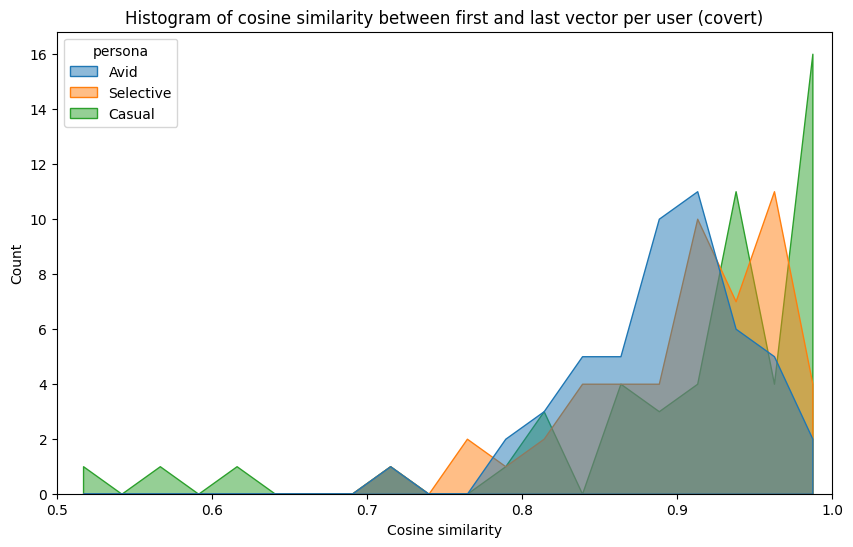

In [8]:
# Plot vector differences for covert model by reader persona

plot_vector_diffs_by_persona(df=df_results_covert_filtered, model="covert")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


00/40


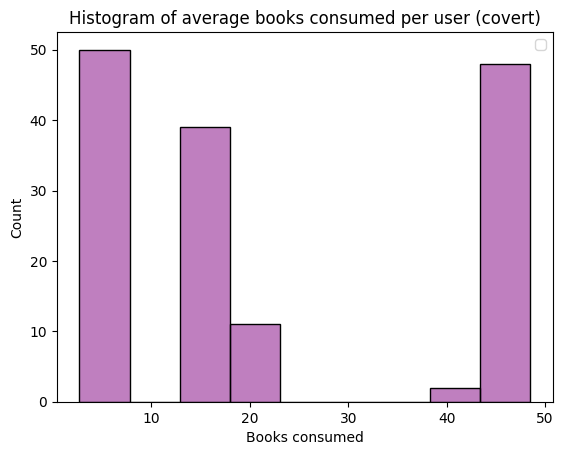

In [9]:
# Plot average books consumed per user for covert model

plot_books_consumed("covert")

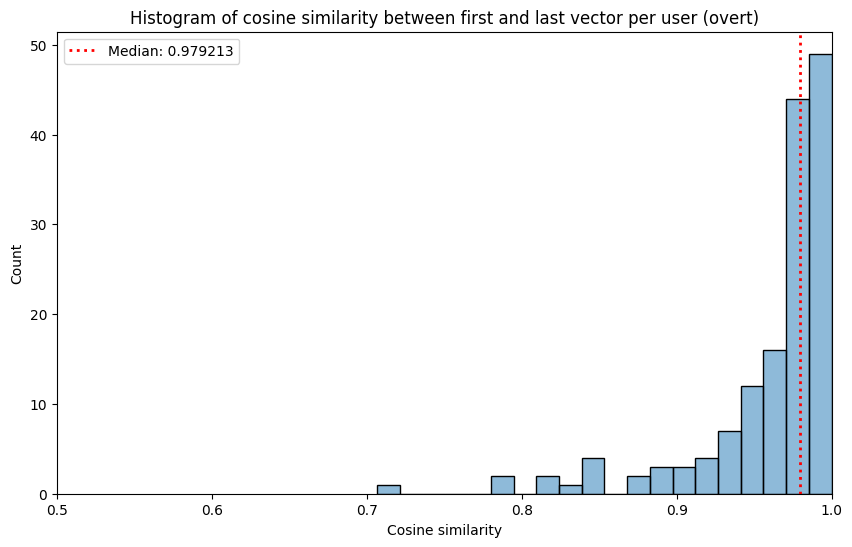

In [10]:
# Plot vector differences for overt model

df_users_overt = dfs_users_overt[0][["unique_id", "persona"]].rename(columns={"unique_id": "AgentID"})
df_results_overt = pd.concat(dfs_results_overt)
df_results_overt_filtered = df_results_overt.groupby(["AgentID"]).vector_diff.mean().reset_index()
df_results_overt_filtered = df_results_overt_filtered.merge(df_users_overt, how="inner", on="AgentID")
plot_vector_diffs(df=df_results_overt_filtered, model="overt")

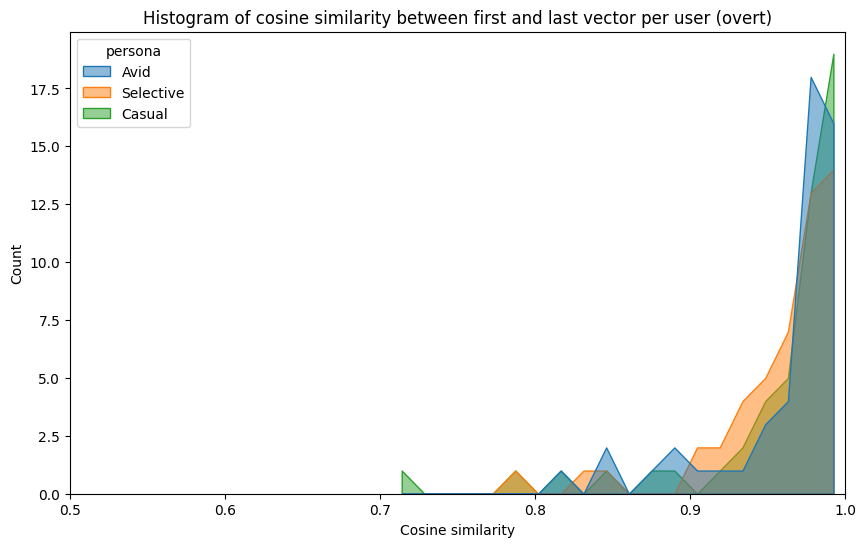

In [11]:
# Plot vector differences for overt model by reader persona

plot_vector_diffs_by_persona(df=df_results_overt_filtered, model="overt")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


00/60


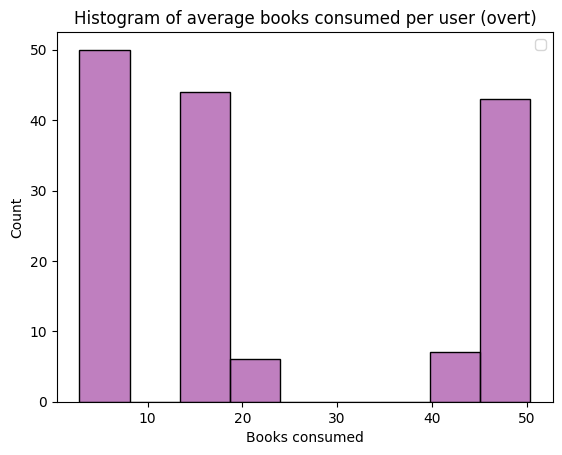

In [12]:
# Plot average books consumed per user for overt model

plot_books_consumed("overt")

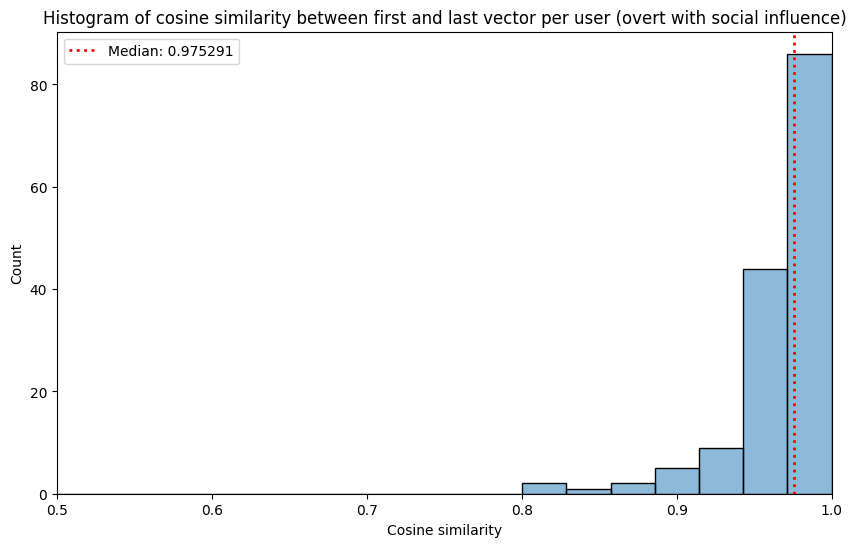

In [13]:
# Plot vector differences for overt with social influence model

df_users_overt_w_si = dfs_users_overt_w_si[0][["unique_id", "persona"]].rename(columns={"unique_id": "AgentID"})
df_results_overt_w_si = pd.concat(dfs_results_overt_w_si)
df_results_overt_w_si_filtered = df_results_overt_w_si.groupby(["AgentID"]).vector_diff.mean().reset_index()
df_results_overt_w_si_filtered = df_results_overt_w_si_filtered.merge(df_users_overt_w_si, how="inner", on="AgentID")
plot_vector_diffs(df=df_results_overt_w_si_filtered, model="overt with social influence")

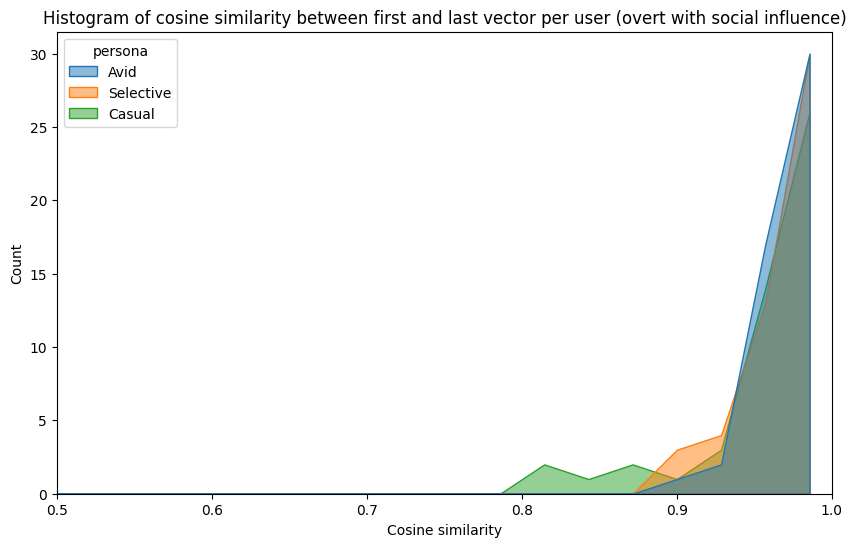

In [14]:
# Plot vector differences for overt model with social influence by reader persona

plot_vector_diffs_by_persona(df=df_results_overt_w_si_filtered, model="overt with social influence")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


00/80


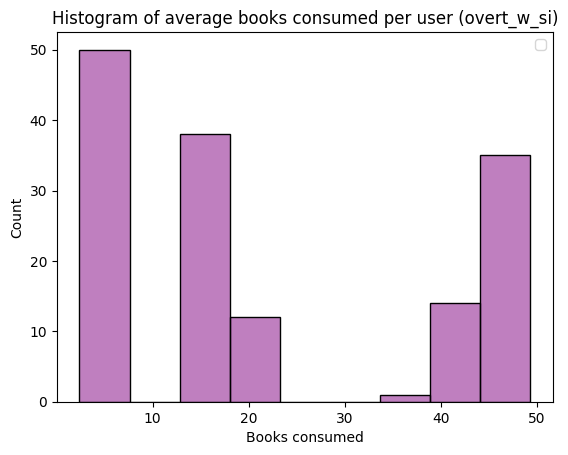

In [15]:
# Plot average books consumed per user for overt with social influece model

plot_books_consumed("overt_w_si")